# Analysis

**Hypothesis**: Cells in severe COVID-19 patients exhibit a distinct metabolic reprogramming compared to healthy individuals, characterized by elevated mitochondrial stress (as measured by percent_mt) and altered ribosomal activity (assessed through percent_rpl and percent_rps). This metabolic shift, especially in key immune subsets like monocytes and T cells, likely reflects an adaptive response to systemic inflammation, potentially contributing to disease severity. Notably, elevated percent_mt serves as a proxy for mitochondrial dysfunction or stress, while variations in percent_rpl and percent_rps may indicate adjustments in protein synthesis mechanisms in response to cellular activation.

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Set up visualization defaults for better plots
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figsize = (8, 8)
sc.settings.dpi = 100
sc.settings.facecolor = 'white'
warnings.filterwarnings('ignore')

# Set Matplotlib and Seaborn styles for better visualization
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['savefig.dpi'] = 150
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

# Load data
print("Loading data...")
adata = sc.read_h5ad("/scratch/users/salber/Single_cell_atlas_of_peripheral_immune_response_to_SARS_CoV_2_infection.h5ad")
print(f"Data loaded: {adata.shape[0]} cells and {adata.shape[1]} genes")


Loading data...


Data loaded: 44721 cells and 26361 genes


# Analysis Plan

**Hypothesis**: Cells in severe COVID-19 patients exhibit a distinct metabolic reprogramming compared to healthy individuals, characterized by elevated mitochondrial stress (as measured by percent_mt) and altered ribosomal activity (assessed through percent_rpl and percent_rps). This metabolic shift, especially in key immune subsets like monocytes and T cells, likely reflects an adaptive response to systemic inflammation, potentially contributing to disease severity. Notably, elevated percent_mt serves as a proxy for mitochondrial dysfunction or stress, while variations in percent_rpl and percent_rps may indicate adjustments in protein synthesis mechanisms in response to cellular activation.

## Steps:
1. Step 1: Conduct an exploratory analysis by examining the distribution of metabolic metrics. Begin with percent_mt, a known proxy for mitochondrial stress, across COVID-19 and healthy samples, stratifying by cell types (cell_type_coarse). Include inline commentary to explain the biological relevance of percent_mt and prepare placeholders for parallel analyses using percent_rpl and percent_rps.
2. Step 2: Perform statistical comparisons using Mann-Whitney U tests for each metabolic metric (percent_mt, percent_rpl, and percent_rps) between COVID-19 patients and healthy individuals within selected relevant cell types, especially monocytes and T cells, to determine statistical significance.
3. Step 3: Evaluate correlations between interferon response (measured by IFN1 expression) and the metabolic markers. Use scatter plots with regression lines, stratified by cell type, to assess whether higher interferon responses are associated with metabolic stress.
4. Step 4: Visualize the integrated results by designing a grid layout. This should include sets of boxplots for metabolic metrics stratified by Status and cell type, alongside scatter plots that depict the relationship between IFN1 expression and these metabolic markers, thereby linking metabolic changes with inflammatory status.
5. Step 5: Summarize and interpret the findings, highlighting the immune cell subpopulations that exhibit a distinct metabolic-inflammation profile in severe COVID-19 cases and discussing potential mechanistic implications.


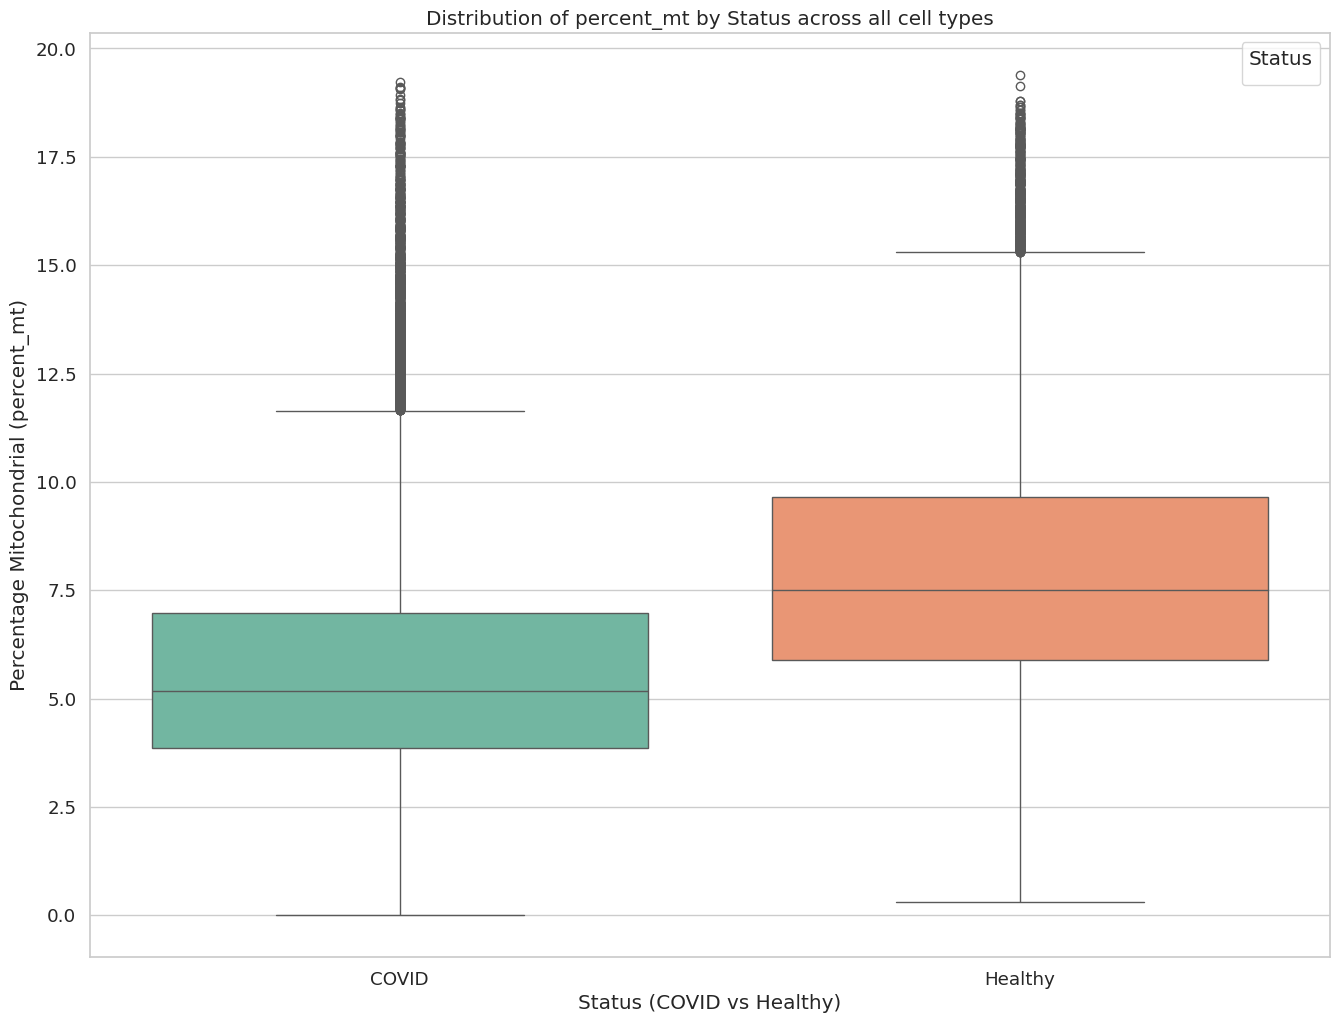

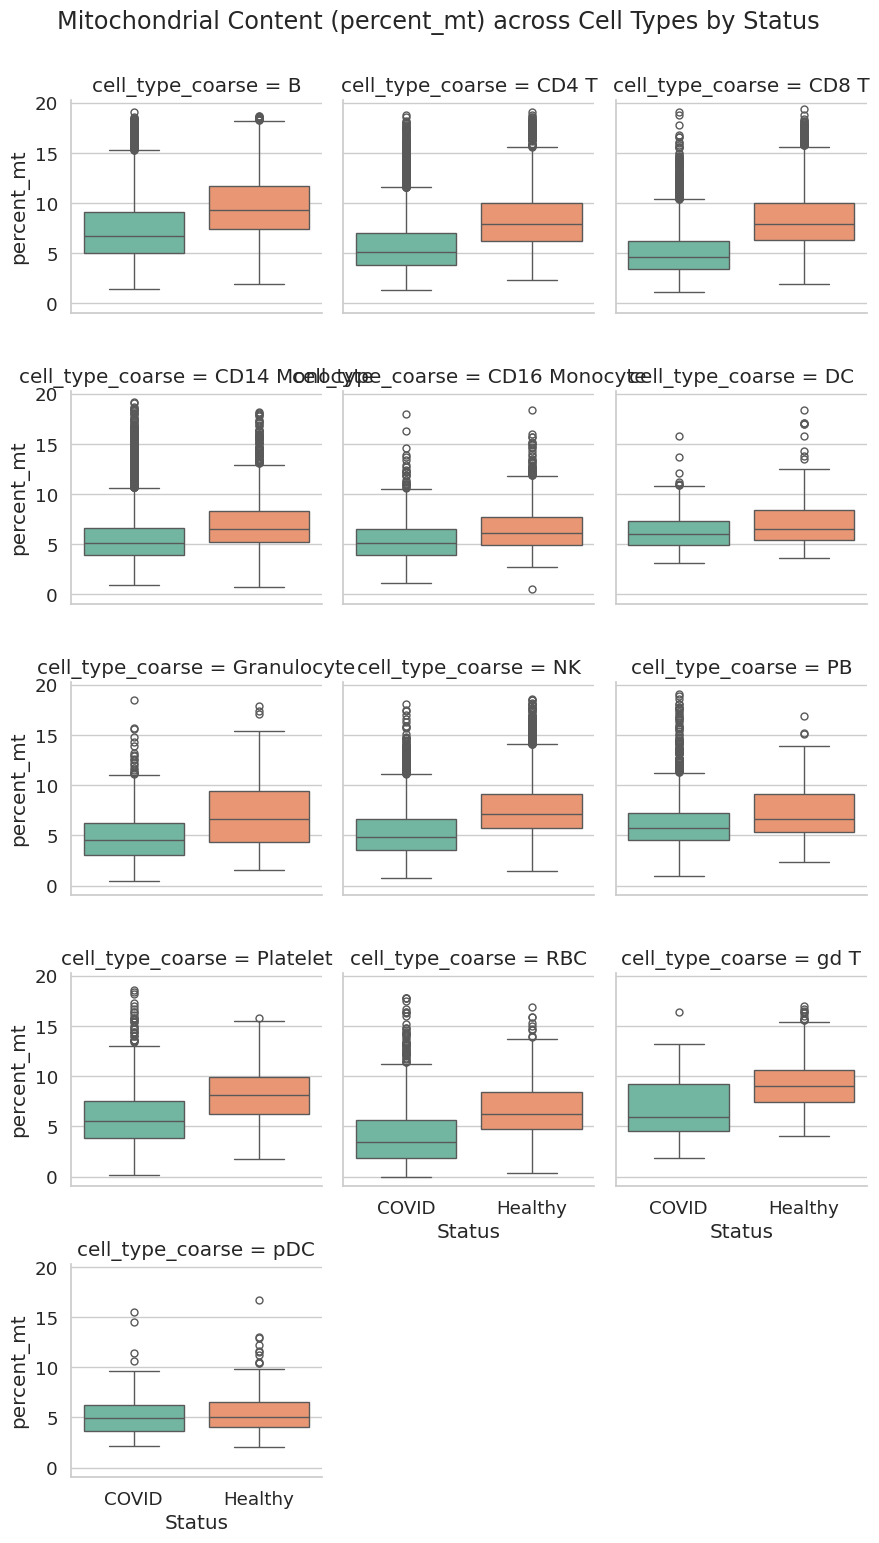

                           count      mean       std       min       25%  \
cell_type_coarse Status                                                    
B                COVID    3028.0  7.389575  3.241091  1.479290  5.018253   
                 Healthy  1994.0  9.783493  3.136001  1.927273  7.401290   
CD4 T            COVID    5562.0  5.800133  2.767323  1.362948  3.886340   
                 Healthy  2835.0  8.430826  3.020544  2.344382  6.226070   
CD8 T            COVID    3877.0  5.186194  2.414139  1.169591  3.479853   
                 Healthy  2885.0  8.455794  2.898506  1.982161  6.334081   
CD14 Monocyte    COVID    8285.0  5.638788  2.465130  0.953289  3.963199   
                 Healthy  2054.0  7.075962  2.661282  0.793651  5.198994   
CD16 Monocyte    COVID     433.0  5.597517  2.466698  1.101495  3.914965   
                 Healthy   915.0  6.612630  2.348559  0.575705  4.975768   
DC               COVID     252.0  6.367705  1.959622  3.154930  4.976408   
            

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Exploratory analysis: Examine the distribution of percent_mt by Status and cell type (cell_type_coarse)

# Create a copy of the metadata as a DataFrame
meta = adata.obs.copy()

# Select the columns of interest: Status, cell_type_coarse, and percent_mt
meta = meta[['Status', 'cell_type_coarse', 'percent_mt']]

# Create a boxplot for percent_mt stratified by Status and faceted by cell_type_coarse
plt.figure(figsize=(16, 12))
sns.boxplot(x='Status', y='percent_mt', hue='Status', data=meta, palette='Set2')
plt.title('Distribution of percent_mt by Status across all cell types')
plt.ylabel('Percentage Mitochondrial (percent_mt)')
plt.xlabel('Status (COVID vs Healthy)')
plt.legend(title='Status')
plt.show()

# Additionally, create facet grid boxplots by cell_type_coarse
g = sns.catplot(x='Status', y='percent_mt', col='cell_type_coarse', data=meta, kind='box', col_wrap=3, palette='Set2', height=3)
g.fig.suptitle('Mitochondrial Content (percent_mt) across Cell Types by Status', y=1.03)
plt.show()

# Print summary statistics for percent_mt for each group per cell type
summary = meta.groupby(['cell_type_coarse', 'Status'])['percent_mt'].describe()
print(summary)